In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('data/forex.csv')
df

,slug,date,open,high,low,close,currency
0,GBP/EGP,2001-04-10,5.580900,5.594700,5.594700,5.594700,EGP
1,GBP/EGP,2001-06-04,5.475170,5.493900,5.493900,5.493900,EGP
2,GBP/EGP,2001-08-01,5.679900,5.654300,5.654300,5.654300,EGP
3,GBP/EGP,2002-07-29,7.217000,7.217000,7.217000,7.217000,EGP
4,GBP/EGP,2003-01-02,7.424290,7.389900,7.389900,7.389900,EGP
...,...,...,...,...,...,...,...
1453030,USD/MXN,2021-08-24,20.317129,20.360830,20.238400,20.317949,MXN
1453031,USD/MXN,2021-08-25,20.202400,20.347589,20.160601,20.206100,MXN
1453032,USD/MXN,2021-08-26,20.228861,20.384501,20.211901,20.216101,MXN
1453033,USD/MXN,2021-08-27,20.369301,20.423140,20.191200,20.366501,MXN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453035 entries, 0 to 1453034
Data columns (total 7 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   slug      1453035 non-null  object 
 1   date      1453035 non-null  object 
 2   open      1453035 non-null  float64
 3   high      1453035 non-null  float64
 4   low       1453035 non-null  float64
 5   close     1453035 non-null  float64
 6   currency  1453035 non-null  object 
dtypes: float64(4), object(3)
memory usage: 77.6+ MB


In [4]:
df.isnull().sum()

slug        0
date        0
open        0
high        0
low         0
close       0
currency    0
dtype: int64

In [5]:
df = df.set_index('date')
df

,slug,open,high,low,close,currency
date,,,,,,
2001-04-10,GBP/EGP,5.580900,5.594700,5.594700,5.594700,EGP
2001-06-04,GBP/EGP,5.475170,5.493900,5.493900,5.493900,EGP
2001-08-01,GBP/EGP,5.679900,5.654300,5.654300,5.654300,EGP
2002-07-29,GBP/EGP,7.217000,7.217000,7.217000,7.217000,EGP
2003-01-02,GBP/EGP,7.424290,7.389900,7.389900,7.389900,EGP
...,...,...,...,...,...,...
2021-08-24,USD/MXN,20.317129,20.360830,20.238400,20.317949,MXN
2021-08-25,USD/MXN,20.202400,20.347589,20.160601,20.206100,MXN
2021-08-26,USD/MXN,20.228861,20.384501,20.211901,20.216101,MXN


In [6]:
df.index = pd.to_datetime(df.index)

In [7]:
df['slug'].unique()

array(['GBP/EGP', 'GBP/SCR', 'GBP/NOK', 'EUR/SZL', 'AUD/MYR', 'JPY/PKR',
       'CHF/NZD', 'GBP/CUP', 'EUR/PKR', 'AUD/CAD', 'JPY/CHF', 'USD/ZMW',
       'EUR/FJD', 'GBP/XOF', 'GBP/IDR', 'CHF/JPY', 'GBP/UAH', 'GBP/TWD',
       'INR/PKR', 'GBP/CHF', 'EUR/MMK', 'JPY/BRL', 'CHF/MYR', 'CHF/IDR',
       'CHF/CNY', 'GBP/HUF', 'CHF/MXN', 'JPY/MYR', 'GBP/BMD', 'USD/KWD',
       'USD/EGP', 'GBP/SZL', 'USD/BRL', 'GBP/BBD', 'AUD/MXN', 'USD/XOF',
       'USD/NOK', 'GBP/TTD', 'GBP/SEK', 'CHF/HUF', 'EUR/BWP', 'USD/HNL',
       'USD/CZK', 'GBP/ISK', 'GBP/LKR', 'JPY/USD', 'EUR/RON', 'INR/EUR',
       'AUD/TWD', 'GBP/TND', 'EUR/UAH', 'AUD/ZAR', 'GBP/SGD', 'USD/BYN',
       'EUR/PEN', 'USD/XPF', 'EUR/THB', 'AUD/GBP', 'EUR/KRW', 'GBP/AUD',
       'JPY/AUD', 'EUR/USD', 'AUD/NOK', 'EUR/MOP', 'USD/GBP', 'CHF/SEK',
       'INR/CHF', 'GBP/PGK', 'GBP/MOP', 'GBP/PHP', 'GBP/BSD', 'EUR/CRC',
       'AUD/EUR', 'INR/AUD', 'EUR/JOD', 'USD/MZN', 'JPY/NOK', 'CHF/TRY',
       'EUR/PGK', 'GBP/BGN', 'CHF/CZK', 'GBP/XPF', 

In [8]:
target_slug = "GBP/EGP"

In [9]:
pair = df[df['slug'] == target_slug].copy()
pair

,slug,open,high,low,close,currency
date,,,,,,
2001-04-10,GBP/EGP,5.580900,5.594700,5.594700,5.594700,EGP
2001-06-04,GBP/EGP,5.475170,5.493900,5.493900,5.493900,EGP
2001-08-01,GBP/EGP,5.679900,5.654300,5.654300,5.654300,EGP
2002-07-29,GBP/EGP,7.217000,7.217000,7.217000,7.217000,EGP
2003-01-02,GBP/EGP,7.424290,7.389900,7.389900,7.389900,EGP
...,...,...,...,...,...,...
2021-08-24,GBP/EGP,21.515955,21.577103,21.389523,21.516960,EGP
2021-08-25,GBP/EGP,21.520658,21.585920,21.357267,21.520695,EGP
2021-08-26,GBP/EGP,21.582624,21.606640,21.387648,21.582624,EGP


In [10]:
pair = pair.sort_index()
pair

,slug,open,high,low,close,currency
date,,,,,,
2001-04-10,GBP/EGP,5.580900,5.594700,5.594700,5.594700,EGP
2001-06-04,GBP/EGP,5.475170,5.493900,5.493900,5.493900,EGP
2001-08-01,GBP/EGP,5.679900,5.654300,5.654300,5.654300,EGP
2002-07-29,GBP/EGP,7.217000,7.217000,7.217000,7.217000,EGP
2003-01-02,GBP/EGP,7.424290,7.389900,7.389900,7.389900,EGP
...,...,...,...,...,...,...
2021-08-24,GBP/EGP,21.515955,21.577103,21.389523,21.516960,EGP
2021-08-25,GBP/EGP,21.520658,21.585920,21.357267,21.520695,EGP
2021-08-26,GBP/EGP,21.582624,21.606640,21.387648,21.582624,EGP


In [11]:
pair.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4536 entries, 2001-04-10 to 2021-08-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   slug      4536 non-null   object 
 1   open      4536 non-null   float64
 2   high      4536 non-null   float64
 3   low       4536 non-null   float64
 4   close     4536 non-null   float64
 5   currency  4536 non-null   object 
dtypes: float64(4), object(2)
memory usage: 248.1+ KB


In [12]:
# удаляем данные в GBP/EGP за 2001-2003 года, т к их совсем мало
pair = pair[~pair.index.year.isin([2001, 2002, 2003])]

In [13]:
pair.head(20)

,slug,open,high,low,close,currency
date,,,,,,
2004-02-13,GBP/EGP,11.607,11.6420,11.5200,11.578,EGP
2004-02-16,GBP/EGP,11.571,11.6230,11.4990,11.607,EGP
2004-02-17,GBP/EGP,11.608,11.7390,11.5210,11.662,EGP
2004-02-18,GBP/EGP,11.677,11.7720,11.6310,11.691,EGP
2004-02-19,GBP/EGP,11.691,11.7050,11.5220,11.603,EGP
2004-02-20,GBP/EGP,11.603,11.6440,11.3878,11.463,EGP
2004-02-23,GBP/EGP,11.469,11.5140,11.3185,11.503,EGP
2004-02-24,GBP/EGP,11.502,11.6382,11.3890,11.611,EGP
2004-02-25,GBP/EGP,11.612,11.6481,11.4961,11.520,EGP


In [15]:
pair_filled = pair.resample('D').ffill()

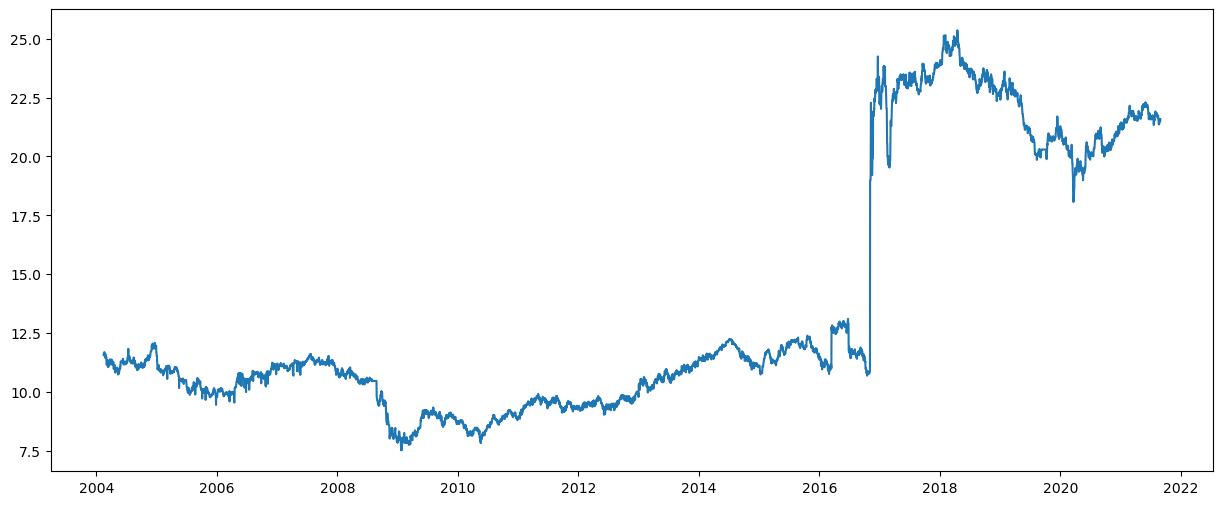

In [16]:
plt.figure(figsize=(15, 6))

plt.plot(pair_filled.index, pair_filled.close)

In [19]:
def adf_report(series, name=""):
    series = series.dropna()
    result = adfuller(series)
    stat, pvalue, usedlag, nobs, critical_values, icbest = result
    
    print(f"=== ADF-тест для {name} ===")
    print(f"Статистика: {stat:.4f}")
    print(f"p-value: {pvalue:.4f}")
    print(f"Исп. лагов: {usedlag}")
    print("Критические значения:")
    for k, v in critical_values.items():
        print(f"  {k}: {v:.4f}")
    if pvalue < 0.05:
        print("p-value < 0.05, ряд можно считать стационарным.")
    else:
        print("p-value >= 0.05, ряд нестационарен.")
    print()

# ADF для исходного ряда close
adf_report(pair_filled['close'], name=f"{target_slug} close")

# ADF для первой разности
adf_report(pair_filled['close'].diff(), name=f"{target_slug} diff(close)")

=== ADF-тест для GBP/EGP close ===
Статистика: -0.7085
p-value: 0.8445
Исп. лагов: 33
Критические значения:
  1%: -3.4314
  5%: -2.8620
  10%: -2.5670
p-value >= 0.05, ряд нестационарен.

=== ADF-тест для GBP/EGP diff(close) ===
Статистика: -13.3891
p-value: 0.0000
Исп. лагов: 34
Критические значения:
  1%: -3.4314
  5%: -2.8620
  10%: -2.5670
p-value < 0.05, ряд можно считать стационарным.



#### gjhb

In [23]:
data = pair_filled[['close']].copy()
data

,close
date,
2004-02-13,11.578000
2004-02-14,11.578000
2004-02-15,11.578000
2004-02-16,11.607000
2004-02-17,11.662000
...,...
2021-08-26,21.582624
2021-08-27,21.482431
2021-08-28,21.482431


In [24]:
max_lag = 30

In [26]:
# Генерация лагов
for lag in range(1, max_lag + 1):
    data[f'lag_{lag}'] = data['close'].shift(lag)

In [27]:
horizons = [7, 14, 21, 28]

In [28]:
# Для каждого горизонта создаем свой таргет: close через h шагов
for h in horizons:
    data[f'target_h{h}'] = data['close'].shift(-h)

In [29]:
data_model = data.dropna().reset_index(drop=True)

data_model.head()

,close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,...,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,target_h7,target_h14,target_h21,target_h28
0,11.0660,11.0660,11.0660,11.058,11.087,11.323,11.344,11.354,11.354,11.354,...,11.691,11.662,11.607,11.578,11.578,11.578,11.283,11.169,11.245,11.234
1,11.0750,11.0660,11.0660,11.066,11.058,11.087,11.323,11.344,11.354,11.354,...,11.603,11.691,11.662,11.607,11.578,11.578,11.387,11.178,11.161,11.275
2,11.1869,11.0750,11.0660,11.066,11.066,11.058,11.087,11.323,11.344,11.354,...,11.463,11.603,11.691,11.662,11.607,11.578,11.366,11.240,11.321,11.155
3,11.1400,11.1869,11.0750,11.066,11.066,11.066,11.058,11.087,11.323,11.344,...,11.463,11.463,11.603,11.691,11.662,11.607,11.324,11.317,11.277,11.033
4,11.2860,11.1400,11.1869,11.075,11.066,11.066,11.066,11.058,11.087,11.323,...,11.463,11.463,11.463,11.603,11.691,11.662,11.191,11.378,11.224,10.975


In [30]:
n = len(data_model)
split_idx = int(n * 0.8)

train_data = data_model.iloc[:split_idx]
test_data  = data_model.iloc[split_idx:]

# Список признаков (все lag_*)
feature_cols = [c for c in data_model.columns if c.startswith('lag_')]

len(train_data), len(test_data), feature_cols[:5]

(5080, 1271, ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5'])

In [31]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [52]:
test_data.index

RangeIndex(start=5080, stop=6351, step=1)

In [54]:
final_rows = []

for h in horizons:
    target_col = f"target_h{h}"

    # Последняя строка train (она и есть точка, откуда предсказываем)
    X_last = train_data.iloc[[-1]][feature_cols]
    last_train_index = train_data.index[-1]

    real_value = data_model.loc[last_train_index + h, "close"]

    # XGBoost
    xgb = XGBRegressor(
        n_estimators=200,
        max_depth=4,
        learning_rate=0.05,
        random_state=42,
        n_jobs=-1
    )
    xgb.fit(train_data[feature_cols], train_data[target_col])
    pred_xgb = float(xgb.predict(X_last)[0])

    final_rows.append({
        "Горизонт_дней": h,
        "Модель": "XGBoost",
        "Прогноз": round(pred_xgb, 6),
        "Реальное": round(real_value, 6),
        "Ошибка": round(abs(real_value - pred_xgb), 6)
    })

    # LightGBM
    lgbm = LGBMRegressor(
        n_estimators=200,
        learning_rate=0.05,
        random_state=42,
        n_jobs=-1
    )
    lgbm.fit(train_data[feature_cols], train_data[target_col])
    pred_lgbm = float(lgbm.predict(X_last)[0])

    final_rows.append({
        "Горизонт_дней": h,
        "Модель": "LightGBM",
        "Прогноз": round(pred_lgbm, 6),
        "Реальное": round(real_value, 6),
        "Ошибка": round(abs(real_value - pred_lgbm), 6)
    })

results_table = pd.DataFrame(final_rows)
results_table


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 5080, number of used features: 30
[LightGBM] [Info] Start training from score 11.568939
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 5080, number of used features: 30
[LightGBM] [Info] Start training from score 11.587532
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 5080, number of used features: 30
[LightGBM] [Info] Start trai

,Горизонт_дней,Модель,Прогноз,Реальное,Ошибка
0,7,XGBoost,24.820465,24.801001,0.019464
1,7,LightGBM,24.702643,24.801001,0.098358
2,14,XGBoost,24.679012,24.593000,0.086012
3,14,LightGBM,24.693258,24.593000,0.100258
4,21,XGBoost,24.512827,24.261999,0.250828
5,21,LightGBM,24.671178,24.261999,0.409179
6,28,XGBoost,24.556898,24.486000,0.070898
7,28,LightGBM,24.527594,24.486000,0.041594


## Результаты сравнения моделей

| Горизонт (дней) | Модель    | Прогноз     | Реальное значение | Ошибка |
|-----------------|-----------|-------------|-------------------|--------|
| 7               | XGBoost   | 24.820465   | 24.801001         | 0.019464 |
| 7               | LightGBM  | 24.702643   | 24.801001         | 0.098358 |
| 14              | XGBoost   | 24.679012   | 24.593000         | 0.086012 |
| 14              | LightGBM  | 24.693258   | 24.593000         | 0.100258 |
| 21              | XGBoost   | 24.512827   | 24.261999         | 0.250828 |
| 21              | LightGBM  | 24.671178   | 24.261999         | 0.409179 |
| 28              | XGBoost   | 24.556898   | 24.486000         | 0.070898 |
| 28              | LightGBM  | 24.527594   | 24.486000         | 0.041594 |

---

## Интерпретация результатов

### ✔ 7 дней
- **XGBoost показывает значительно меньшую ошибку**, чем LightGBM.
- Делает более точный ближний прогноз.

### ✔ 14 дней
- Снова **XGBoost** работает немного лучше.
- Ошибки обеих моделей растут, но остаются небольшими.

### ✔ 21 день
- Обе модели начинают ошибаться сильнее — это ожидаемо для более дальнего горизонта.
- **XGBoost по-прежнему заметно лучше**, чем LightGBM.

### ✔ 28 дней
- **LightGBM впервые превосходит XGBoost**, показывая меньшую ошибку.
- Модель лучше удерживает тренд на длинном горизонте.

---

## Общий вывод

- **XGBoost — лидер на ближних и средних горизонтах (7, 14, 21 дней)**.  
  Он стабильнее и точнее при прогнозировании на короткие и средние промежутки времени.

- **LightGBM — лучше на долгосрочном горизонте (28 дней)**.  
  На самом длинном шаге LightGBM выдаёт более корректную оценку будущего значения.